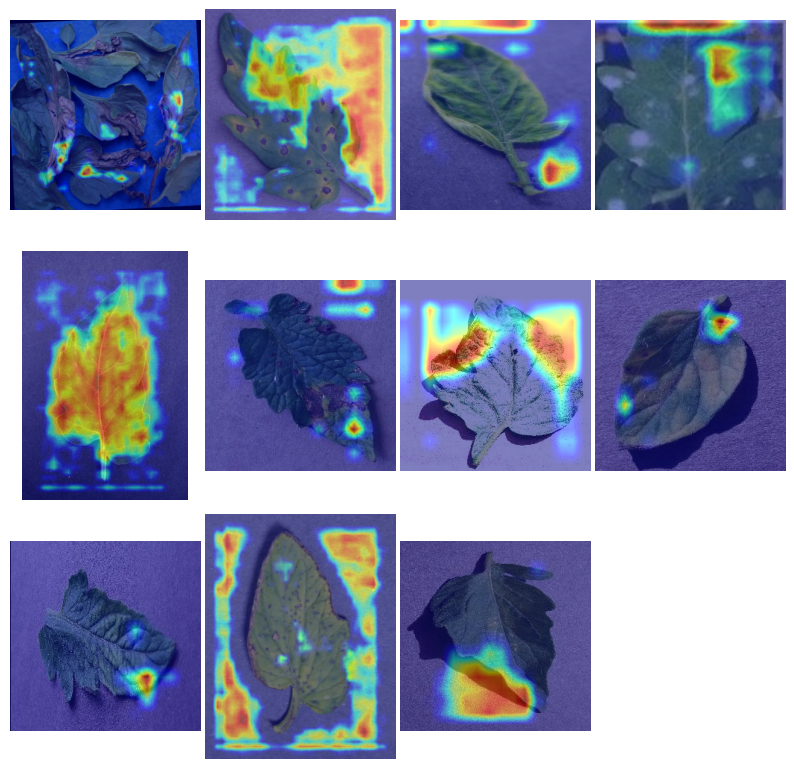

In [6]:
import torch
import numpy as np
import os
from PIL import Image
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import transforms

model = torch.load("./Dataset/resnet18_model.pt")
target_layers = [model.layer3[-1]]

# Get one image from each train folder and save it in a list
images = []
for folder in os.listdir("./Dataset/train"):
    img_path = os.path.join("./Dataset/train", folder, os.listdir(os.path.join("./Dataset/train", folder))[222])
    images.append(img_path)

visualization = []

for path in images:
    rgb_img = Image.open(path).convert('RGB')
    # Max min normalization
    rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
    # Create an input tensor image for your model
    input_tensor = transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
    # Note: input_tensor can be a batch tensor with several images!

    # Construct the CAM object once, and then re-use it on many images:
    cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    visualization.append(show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True))

# Visualize each image in visualization in a grid
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3,4)
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes.

for i, sample in enumerate(visualization):
    ax = plt.subplot(gs[i])
    plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    plt.imshow(sample)
